# Exploratory Data Analysis on Haberman Dataset

### Haberman Survival Dataset

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* The dataset contains 4 columns/features/attributes.
* The first attribute is the 'Age of the patient at the time of operation'.
* The second attribute is the 'Patients year of operation'(1958-1970)
* The third attribute is the 'Number of positive axillary nodes detected'
* The fourth attribute is the 'Survival Status' where '1' means the patient survived 5 years or longer and '2' = the patient died within 5 year.
* Objective :To Predict if the patient survived after undergoing surgery.
## Reference
https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

In [2]:
data = pd.read_csv("haberman.csv")
data.head()  # Displaying first five data 

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### Observation
* The dataset do not contain names for each attribute, so we need to add attribute names.

In [3]:
data.columns = ["Patients's Age during operation","Year of operation","Axillary Nodes","Survival Status"]
data.head()

,Patients's Age during operation,Year of operation,Axillary Nodes,Survival Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
print("Shape is ",data.shape)

Shape is  (305, 4)


In [5]:
print(data['Survival Status'].value_counts())

1    224
2     81
Name: Survival Status, dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Patients's Age during operation  305 non-null    int64
 1   Year of operation                305 non-null    int64
 2   Axillary Nodes                   305 non-null    int64
 3   Survival Status                  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### Observation
* The shape of the dataset is (305,4), i.e it contains 305 rows with 4 columns.
* By the use of info() method, we get to know ,
    1. No missing values in any of the column.
    2.Data type of each column
* By observing the values counts each class in the output feature(1,2), we can say dataset is semi-balanced with 73.7 % of 1(Survived) and 26.55% of 2(Died) with 0 missing output feature.

#### High Level Statisticts of the dataset: number of points, numer of features, number of classes, data-points per class.
* Number of points : 305
* Number of features : 4
* Number of classses : 2
* Data points per class : 1 -> 224   2-> 81

#### Explain our objective.
* Objective: To predict the survival status of the patient after undergoing surgery/operation.

### Observation
* As the operation took place in between 1958-1970,to make 'Year of operation' column more readable , add 1900 to data entry.
* Survival Status has two classes ,they are 1 and 2 , to make it more meaningful replace it with appropriate meaning

In [7]:
data['Year of operation'] = data['Year of operation'] + 1900
data['Survival Status'] = data['Survival Status'].replace(1,"Survived")
data['Survival Status'] = data['Survival Status'].replace(2,"Died")
data.head()

,Patients's Age during operation,Year of operation,Axillary Nodes,Survival Status
0,30,1962,3,Survived
1,30,1965,0,Survived
2,31,1959,2,Survived
3,31,1965,4,Survived
4,33,1958,10,Survived


## 2-D Scatter Plot

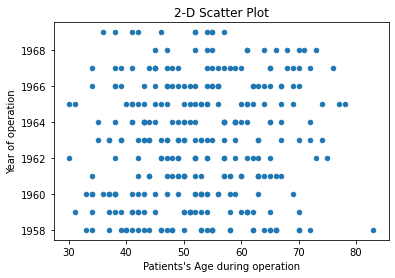

In [8]:
data.plot(kind="scatter",x="Patients's Age during operation",y="Year of operation")
plt.title("2-D Scatter Plot")
plt.show()

* Points are not distinguishable(Survived or died)

C:\Users\WWWAM\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


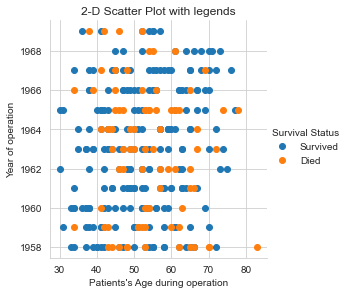

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="Survival Status",size=4)\
   .map(plt.scatter,"Patients's Age during operation","Year of operation")\
    .add_legend()
plt.title("2-D Scatter Plot with legends")
plt.show()

## Pair Plot to plot pairwise relationships in a dataset.

C:\Users\WWWAM\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


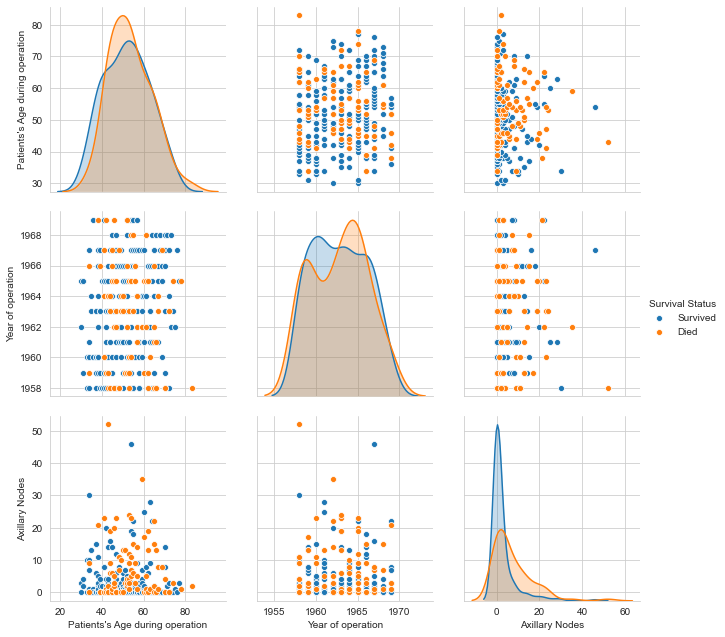

In [10]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue="Survival Status",size=3)
plt.show()

### Observation
* Most of the survived and not survived points overlap each other.
* After observing pair plot it seems none of the features are helpful to seperate if the patient survived or not.

### 1-D Scatter Plot using Patient's Age during operation

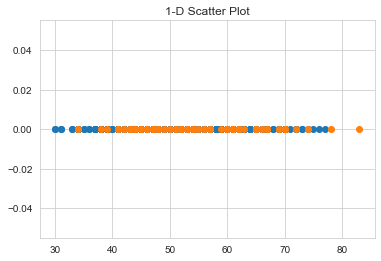

In [11]:
data_survived = data.loc[data["Survival Status"] == "Survived"];
data_dead = data.loc[data["Survival Status"] == "Died"];
plt.plot(data_survived["Patients's Age during operation"], np.zeros_like(data_survived["Patients's Age during operation"]), 'o')
plt.plot(data_dead["Patients's Age during operation"], np.zeros_like(data_dead["Patients's Age during operation"]), 'o')
plt.title("1-D Scatter Plot")
plt.show()

### Observation
* Points are overlapping.
* Hard to find threshold to seperate.

## Density Plot

C:\Users\WWWAM\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


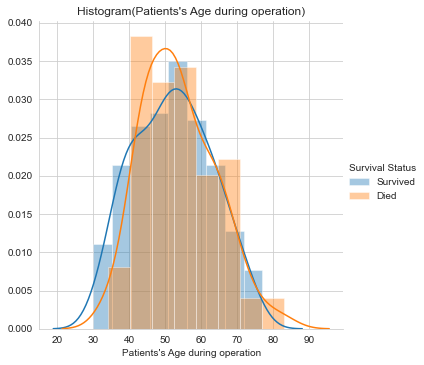

In [12]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="Survival Status",size=5).map(sns.distplot,"Patients's Age during operation").add_legend()
plt.title("Histogram(Patients's Age during operation)")
plt.show()

C:\Users\WWWAM\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


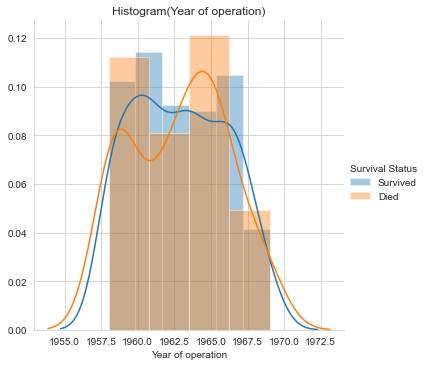

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="Survival Status",size=5).map(sns.distplot,"Year of operation").add_legend()
plt.title("Histogram(Year of operation)")
plt.show()

C:\Users\WWWAM\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


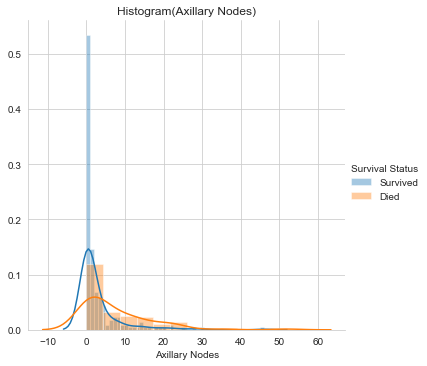

In [14]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="Survival Status",size=5).map(sns.distplot,"Axillary Nodes").add_legend()
plt.title("Histogram(Axillary Nodes)")
plt.show()

### Observation
* After observing, density plots of each attribute with the output attribute,none of the plots helped in seperating two classes.
* Compared to three input attributes, 'Axilary nodes' attribute density plot is pretty better in seperating some of the points when compared to other attributs.
* Axilary nodes > Patient's age during operation >> Year of operation.

## PDF and CDF

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


Text(0.5, 1.0, 'PDF & CDF')

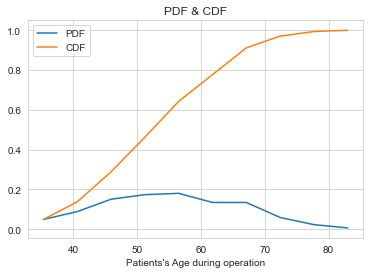

In [15]:
counts, bin_edges = np.histogram(data["Patients's Age during operation"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Patients's Age during operation")
plt.gca().legend(('PDF','CDF'));
plt.title('PDF & CDF')


### Observation
* About 19 percentage of points have the age ranging from 50 to 57 (19 percentage of patients of age ranging from 48 to 54 have undergone operation/surgery).
* There are 85 percentage of the patients with age group less than 66 who have undergone operation/surgery.

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0.5, 1.0, 'PDF & CDF')

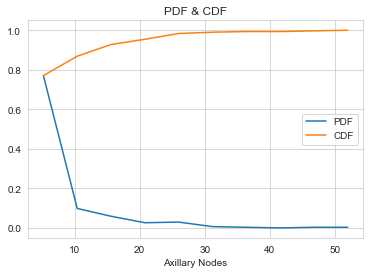

In [16]:
counts, bin_edges = np.histogram(data["Axillary Nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Axillary Nodes")
plt.gca().legend(('PDF','CDF'));
plt.title('PDF & CDF')

### Observation
* There nearly 78 percentage of patients who have axilary nodes less than 5

### Boxplot

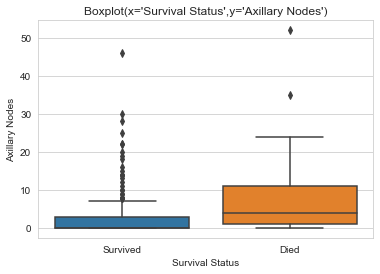

In [17]:
sns.boxplot(x="Survival Status",y="Axillary Nodes",data=data)
plt.title("Boxplot(x='Survival Status',y='Axillary Nodes')")
plt.show()

### Observation
* When axilary nodes are greater than 5,the rate of deaths incrase drastically.

### Violin Plot

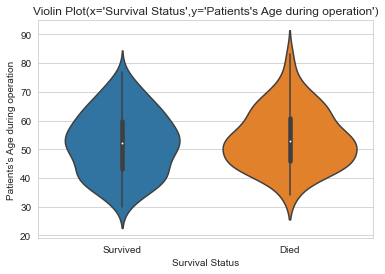

In [18]:
sns.violinplot(x="Survival Status",y="Patients's Age during operation",data=data)
plt.title("Violin Plot(x='Survival Status',y='Patients's Age during operation')")
plt.show()

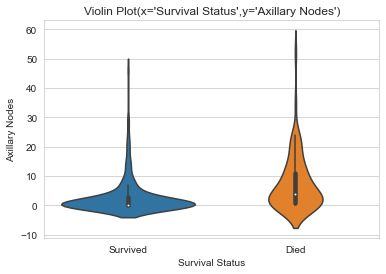

In [19]:
sns.violinplot(x="Survival Status",y="Axillary Nodes",data=data)
plt.title("Violin Plot(x='Survival Status',y='Axillary Nodes')")
plt.show()

### Observation
* Most of the patients with axilary nodes less than 3 have survided.

### Contour Plot

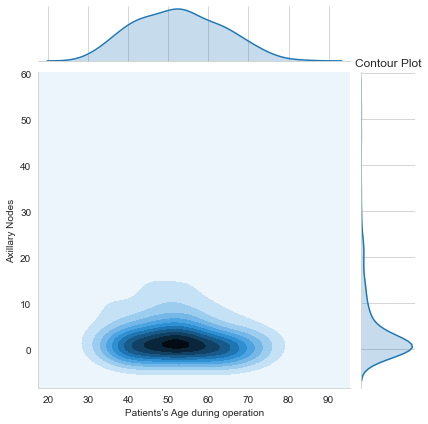

In [20]:
sns.jointplot(x="Patients's Age during operation", y="Axillary Nodes", data=data, kind="kde");
plt.title("Contour Plot")
plt.show();

In [21]:
data.describe()

,Patients's Age during operation,Year of operation,Axillary Nodes
count,305.000000,305.000000,305.000000
mean,52.531148,1962.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,1958.000000,0.000000
25%,44.000000,1960.000000,0.000000
50%,52.000000,1963.000000,1.000000
75%,61.000000,1966.000000,4.000000
max,83.000000,1969.000000,52.000000


## Conclusion
* Among the three independent features, axilary nodes feature is prominent to determine if the patient survived or not.
* There are 85 percentage of the patients with age group less than 66 who have undergone operation/surgery and 19 percentage of patients of age ranging from 48 to 54 have undergone operation/surgery.
* Patients with axilary nodes less than 4 has a high chance of surviving.
* When the axilary nodes counts increases more than 5 , chances of patient not surviving increases(increase in axilary nodes increases death chance).